In [1]:
import pandas as pd
import json
import help_functions as hf
import numpy as np
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
i = 113
with open('training_configurations.json', 'r') as fp:
    config = json.load(fp)[str(i)]
print(config)

{'augment': False, 'oversample': False, 'undersample': False, 'loss_function': 'custom_loss', 'class_weights': False, 'per_class_thresh': False, 'random_initialization': False, 'number_trainable_layers': 0, 'hierarchical': False, 'data_folder': 'data/split_hierarchical_data_221218', 'batch_size': 512, 'basemodel': 'EfficientNetB2', 'epochs': 15, 'nr_classes': 'all', 'image_dimension': 64, 'results_folder': 'results_thesis/113_bs_512'}


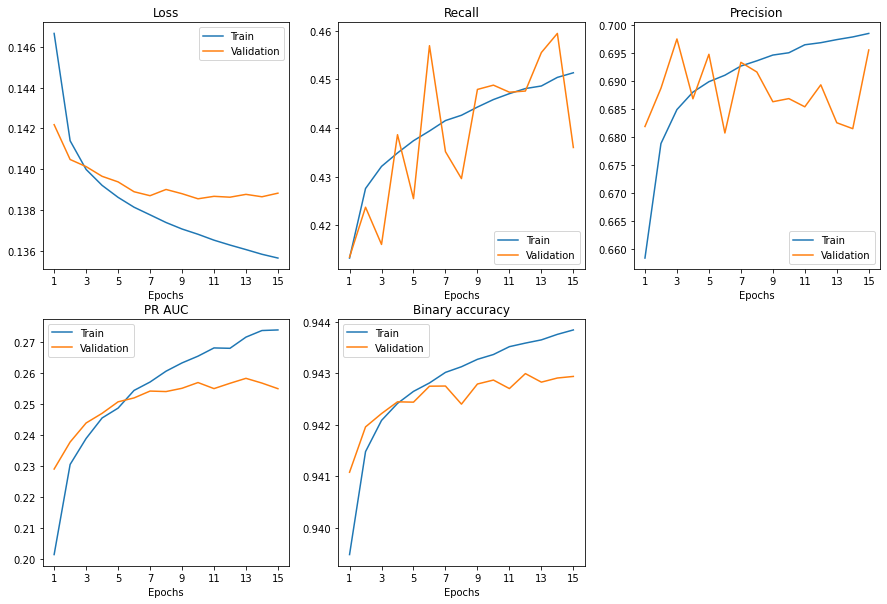

In [3]:
training_metrics = pd.read_csv(config['results_folder'] + '/history.csv')

epochs = training_metrics.shape[0]

_ = plt.figure(figsize=(15, 10))

_ = plt.subplot(2, 3, 1)
plt.plot(range(epochs), training_metrics.loss.values, label='Training loss')
plt.plot(range(epochs), training_metrics.val_loss.values, label='Validation loss')
plt.xlabel('Epochs')
plt.title('Loss')
plt.xticks(np.arange(0, 15, step=2), np.arange(1, 16, step=2))
plt.legend(['Train', 'Validation'])

_ = plt.subplot(2, 3, 2)
plt.plot(range(epochs), training_metrics.recall.values, label='Training recall')
plt.plot(range(epochs), training_metrics.val_recall.values, label='Validation recall')
plt.title('Recall')
plt.xlabel('Epochs')
plt.xticks(np.arange(0, 15, step=2), np.arange(1, 16, step=2))
plt.legend(['Train', 'Validation'])

_ = plt.subplot(2, 3, 3)
plt.plot(range(epochs), training_metrics.precision.values, label='Training precision')
plt.plot(range(epochs), training_metrics.val_precision.values, label='Validation precision')
plt.title('Precision')
plt.xlabel('Epochs')
plt.xticks(np.arange(0, 15, step=2), np.arange(1, 16, step=2))
plt.legend(['Train', 'Validation'])

_ = plt.subplot(2, 3, 4)
plt.plot(range(epochs), training_metrics.pr_auc.values, label='Training PR_AUC')
plt.plot(range(epochs), training_metrics.val_pr_auc.values, label='Validation PR_AUC')
plt.title('PR AUC')
plt.xlabel('Epochs')
plt.xticks(np.arange(0, 15, step=2), np.arange(1, 16, step=2))
plt.legend(['Train', 'Validation'])

_ = plt.subplot(2, 3, 5)
plt.plot(range(epochs), training_metrics.binary_accuracy.values, label='Training binary acc')
plt.plot(range(epochs), training_metrics.val_binary_accuracy.values, label='Validation binary acc')
plt.title('Binary accuracy')
plt.xlabel('Epochs')
plt.xticks(np.arange(0, 15, step=2), np.arange(1, 16, step=2))
plt.legend(['Train', 'Validation'])

hf.save_img(config['results_folder'] + '/training_metrics.png')


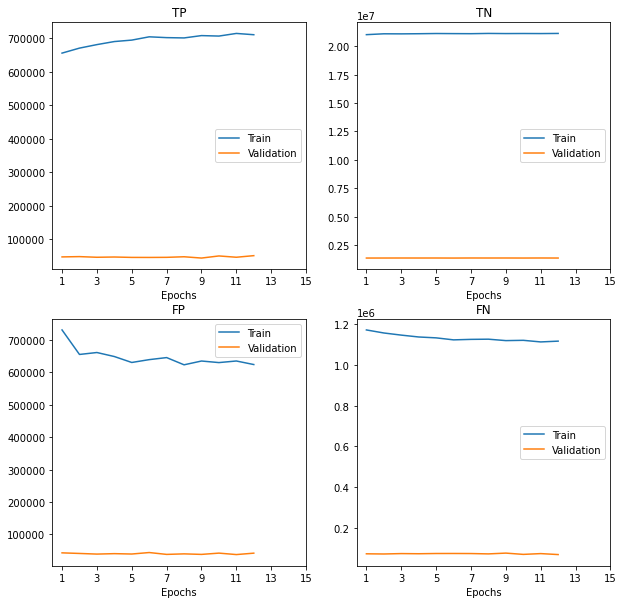

In [4]:
_ = plt.figure(figsize=(10, 10))

_ = plt.subplot(2, 2, 1)
plt.plot(range(epochs), training_metrics.tp.values, label='Training TP')
plt.plot(range(epochs), training_metrics.val_tp.values, label='Validation TP')
plt.xlabel('Epochs')
plt.title('TP')
plt.xticks(np.arange(0, 15, step=2), np.arange(1, 16, step=2))
plt.legend(['Train', 'Validation'])

_ = plt.subplot(2, 2, 2)
plt.plot(range(epochs), training_metrics.tn.values, label='Training TN')
plt.plot(range(epochs), training_metrics.val_tn.values, label='Validation TN')
plt.title('TN')
plt.xlabel('Epochs')
plt.xticks(np.arange(0, 15, step=2), np.arange(1, 16, step=2))
plt.legend(['Train', 'Validation'])

_ = plt.subplot(2, 2, 3)
plt.plot(range(epochs), training_metrics.fp.values, label='Training FP')
plt.plot(range(epochs), training_metrics.val_fp.values, label='Validation FP')
plt.title('FP')
plt.xlabel('Epochs')
plt.xticks(np.arange(0, 15, step=2), np.arange(1, 16, step=2))
plt.legend(['Train', 'Validation'])

_ = plt.subplot(2, 2, 4)
plt.plot(range(epochs), training_metrics.fn.values, label='Training FN')
plt.plot(range(epochs), training_metrics.val_fn.values, label='Validation FN')
plt.title('FN')
plt.xlabel('Epochs')
plt.xticks(np.arange(0, 15, step=2), np.arange(1, 16, step=2))
plt.legend(['Train', 'Validation'])

hf.save_img(config['results_folder'] + '/training_metrics_confusion_matrix.png')